In [22]:
import numpy as np
import a6_utils as a6u
# import UZ_utils
import matplotlib.pyplot as plt
import cv2
import math
import os
import random
import UZ_utils


plt.rcParams['figure.figsize'] = [8, 4]

# 1b

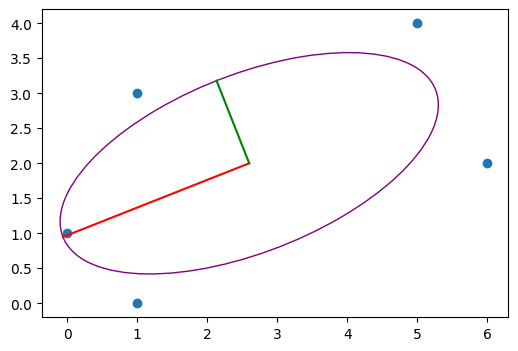

In [34]:


def e1b():
    ptsTrans = np.loadtxt(".\data\points.txt")
    pts = ptsTrans.T.copy()

    # pts = np.append(pts, [[-2], [10]], axis=1)

    # print("pts")
    # print(pts)


    meanVec = np.mean(pts, axis=1).reshape(2,1)
    # print(meanVec)

    X = pts - meanVec
    # print(X)

    numOfPts = pts.shape[1]
    C = 1 / (numOfPts - 1) * (X @ X.T)
    # print(C)

    U, S, _ = np.linalg.svd(C)

    plt.scatter(pts[0,:], pts[1,:])
    a6u.drawEllipse(meanVec, C)

    # print("U")
    # print(U)


    eigenvec1Endpoint = meanVec + U[:,0].reshape(-1,1) * np.sqrt(S[0])
    eigenvec2Endpoint = meanVec + U[:,1].reshape(-1,1) * np.sqrt(S[1])

    # print(U[:,0])
    # print(S[0])
    # print("eigenvec1Endpoint")
    # print(eigenvec1Endpoint)


    plt.plot([meanVec[0], eigenvec1Endpoint[0]], [meanVec[1], eigenvec1Endpoint[1]], color="red")
    plt.plot([meanVec[0], eigenvec2Endpoint[0]], [meanVec[1], eigenvec2Endpoint[1]], color="green")

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.show()


e1b()

# 1c
Question: What do you notice about the relationship between the eigenvectors
and the data? What happens to the eigenvectors if you change the data or add more
points?
The eigenvectors point in the direction of the largest spread. If we add an outlier point that is sufficiently far from the mean, it will dominate in deciding what the strongest eigenvector is.

# 1d
From the graph, determine how many percent of the
information will we retain if we discard the second eigenvector. To put it differently,
what percent of the variance is explained just by using the first eigenvector?

Answer: 83.57% of the varience.

[0.83568947 1.        ]


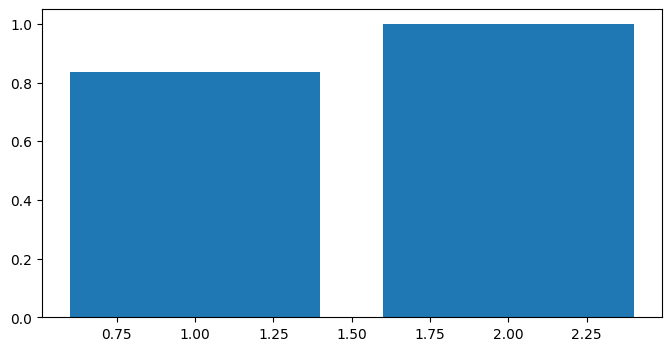

In [24]:


def e1d():
    ptsTrans = np.loadtxt(".\data\points.txt")
    pts = ptsTrans.T.copy()

    # pts = np.append(pts, [[-2], [10]], axis=1)

    # print("pts")
    # print(pts)


    meanVec = np.mean(pts, axis=1).reshape(2,1)
    # print(meanVec)

    X = pts - meanVec
    # print(X)

    numOfPts = pts.shape[1]
    C = 1 / (numOfPts - 1) * (X @ X.T)
    # print(C)

    U, S, _ = np.linalg.svd(C)

    S = S / np.sum(S)
    S = np.cumsum(S)
    print(S)

    plt.bar([1,2], S)
    plt.show()



e1d()



# 1e
Question: What happens to the reconstructed points? Where is the data projected
to?

The datapoints are perpendicularly projected onto the space of the eigenvectors we didn't set to zero.
In this case, this is the line corresponding to the eigenvector corresponding to the largest eigenvalue.

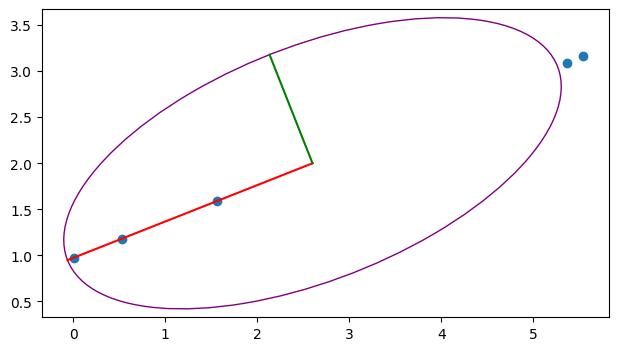

In [35]:

def e1e():

    ptsTrans = np.loadtxt(".\data\points.txt")
    pts = ptsTrans.T.copy()

    # pts = np.append(pts, [[-2], [10]], axis=1)

    # print("pts")
    # print(pts)


    meanVec = np.mean(pts, axis=1).reshape(2,1)
    # print(meanVec)

    X = pts - meanVec
    # print(X)

    numOfPts = pts.shape[1]
    C = 1 / (numOfPts - 1) * (X @ X.T)
    # print(C)

    U, S, _ = np.linalg.svd(C)


    pts = U.T @ X
    pts[1,:] = 0
    pts = U @ pts + meanVec
    



    plt.scatter(pts[0,:], pts[1,:])
    a6u.drawEllipse(meanVec, C)

    # print("U")
    # print(U)


    eigenvec1Endpoint = meanVec + U[:,0].reshape(-1,1) * np.sqrt(S[0])
    eigenvec2Endpoint = meanVec + U[:,1].reshape(-1,1) * np.sqrt(S[1])

    # print(U[:,0])
    # print(S[0])
    # print("eigenvec1Endpoint")
    # print(eigenvec1Endpoint)


    plt.plot([meanVec[0], eigenvec1Endpoint[0]], [meanVec[1], eigenvec1Endpoint[1]], color="red")
    plt.plot([meanVec[0], eigenvec2Endpoint[0]], [meanVec[1], eigenvec2Endpoint[1]], color="green")

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.show()

e1e()

distances
[7.81024968 4.         2.23606798 5.83095189 7.81024968]
ixOfMin
2


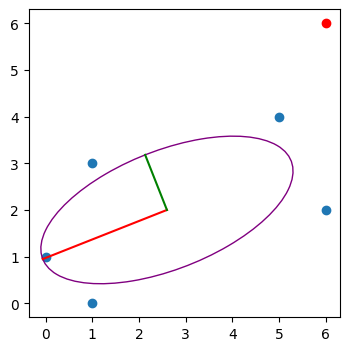

distances
[6.85607608 1.47095288 1.66540579 5.75286142 7.41826722]
ixOfMin
1


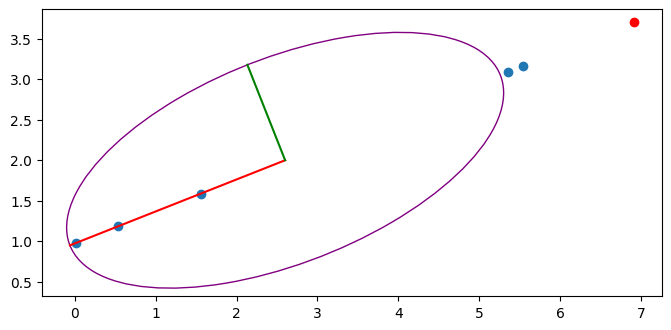

In [36]:
def e1f():

    ptsTrans = np.loadtxt(".\data\points.txt")
    pts = ptsTrans.T.copy()

    # pts = np.append(pts, [[-2], [10]], axis=1)

    # print("pts")
    # print(pts)

    
    newPoint = [[6],[6]]

    distances = np.linalg.norm(pts - newPoint, axis=0)
    print("distances")
    print(distances)
    ixOfMin = np.argmin(distances)
    print("ixOfMin")
    print(ixOfMin)






    meanVec = np.mean(pts, axis=1).reshape(2,1)
    # print(meanVec)

    X = pts - meanVec
    # print(X)

    numOfPts = pts.shape[1]
    C = 1 / (numOfPts - 1) * (X @ X.T)
    # print(C)

    U, S, _ = np.linalg.svd(C)







    plt.scatter(pts[0,:], pts[1,:])
    plt.scatter(newPoint[0], newPoint[1], c="red")
    a6u.drawEllipse(meanVec, C)

    # print("U")
    # print(U)


    eigenvec1Endpoint = meanVec + U[:,0].reshape(-1,1) * np.sqrt(S[0])
    eigenvec2Endpoint = meanVec + U[:,1].reshape(-1,1) * np.sqrt(S[1])

    # print(U[:,0])
    # print(S[0])
    # print("eigenvec1Endpoint")
    # print(eigenvec1Endpoint)


    plt.plot([meanVec[0], eigenvec1Endpoint[0]], [meanVec[1], eigenvec1Endpoint[1]], color="red")
    plt.plot([meanVec[0], eigenvec2Endpoint[0]], [meanVec[1], eigenvec2Endpoint[1]], color="green")

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.show()









    
    




    pts = U.T @ X
    pts[1,:] = 0
    pts = U @ pts + meanVec


    newPoint = U.T @ (newPoint - meanVec)
    newPoint[1] = 0
    newPoint = U @ newPoint + meanVec

    distances = np.linalg.norm(pts - newPoint, axis=0)
    print("distances")
    print(distances)
    ixOfMin = np.argmin(distances)
    print("ixOfMin")
    print(ixOfMin)
    






    plt.scatter(pts[0,:], pts[1,:])
    plt.scatter(newPoint[0], newPoint[1], c="red")
    a6u.drawEllipse(meanVec, C)

    # print("U")
    # print(U)


    eigenvec1Endpoint = meanVec + U[:,0].reshape(-1,1) * np.sqrt(S[0])
    eigenvec2Endpoint = meanVec + U[:,1].reshape(-1,1) * np.sqrt(S[1])

    # print(U[:,0])
    # print(S[0])
    # print("eigenvec1Endpoint")
    # print(eigenvec1Endpoint)


    plt.plot([meanVec[0], eigenvec1Endpoint[0]], [meanVec[1], eigenvec1Endpoint[1]], color="red")
    plt.plot([meanVec[0], eigenvec2Endpoint[0]], [meanVec[1], eigenvec2Endpoint[1]], color="green")

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.show()

e1f()

# 2a

In [38]:
def e2a():
    ptsTrans = np.loadtxt(".\data\points.txt")
    pts = ptsTrans.T.copy()

    # pts = np.append(pts, [[-2], [10]], axis=1)

    # print("pts")
    # print(pts)


    meanVec = np.mean(pts, axis=1).reshape(2,1)
    # print(meanVec)

    X = pts - meanVec
    # print(X)

    numOfPts = pts.shape[1]
    C = 1 / (numOfPts - 1) * (X.T @ X)
    # print(C)

    U, S, _ = np.linalg.svd(C)

    print("U before multiplication")
    print(U)
    print("S")
    print(S)


    U = (X @ U) * ( (S*(numOfPts-1))**(-1/2))



    # plt.scatter(pts[0,:], pts[1,:])
    # a6u.drawEllipse(meanVec, C)

    print("U")
    print(U)


    # eigenvec1Endpoint = meanVec + U[:,0].reshape(-1,1) * np.sqrt(S[0])
    # eigenvec2Endpoint = meanVec + U[:,1].reshape(-1,1) * np.sqrt(S[1])

    # print(U[:,0])
    # print(S[0])
    # print("eigenvec1Endpoint")
    # print(eigenvec1Endpoint)


    # plt.plot([meanVec[0], eigenvec1Endpoint[0]], [meanVec[1], eigenvec1Endpoint[1]], color="red")
    # plt.plot([meanVec[0], eigenvec2Endpoint[0]], [meanVec[1], eigenvec2Endpoint[1]], color="green")

    # ax = plt.gca()
    # ax.set_aspect('equal', adjustable='box')

    # plt.show()


e2a()

U before multiplication
[[-3.88458791e-01 -5.00994513e-01  1.30468121e-01  7.07956096e-01
  -2.82631386e-01]
 [ 5.52412344e-01 -4.92653936e-01  5.88330518e-01 -2.41233018e-01
  -2.18647054e-01]
 [ 5.18438166e-01  3.85075940e-01 -2.53026569e-01  3.52892598e-01
  -6.27999012e-01]
 [-1.95708730e-01  5.98252977e-01  7.56781759e-01  1.76273908e-01
  -5.89462455e-04]
 [-4.86682989e-01  1.03195331e-02 -1.02076203e-02 -5.33853089e-01
  -6.91324713e-01]]
S
[8.18975683e+00 1.61024317e+00 3.37302961e-16 2.92931853e-16
 1.39440516e-16]
U
[[ 9.29929353e-01 -3.67738219e-01 -7.83967884e-09 -6.48674657e-09
   2.82057073e-08]
 [ 3.67738219e-01  9.29929353e-01 -1.20901071e-08 -1.29734931e-08
   1.41028536e-08]]


In [39]:
def e2b():
    ptsTrans = np.loadtxt(".\data\points.txt")
    pts = ptsTrans.T.copy()

    # pts = np.append(pts, [[-2], [10]], axis=1)

    print("pts before:")
    print(pts)


    meanVec = np.mean(pts, axis=1).reshape(2,1)
    # print(meanVec)

    X = pts - meanVec
    # print(X)

    numOfPts = pts.shape[1]
    C = 1 / (numOfPts - 1) * (X.T @ X)
    # print(C)

    U, S, _ = np.linalg.svd(C)

    U = (X @ U) * ( (S*(numOfPts-1))**(-1/2))



    # plt.scatter(pts[0,:], pts[1,:])
    # a6u.drawEllipse(meanVec, C)

    # print("U")
    # print(U)


    pts = U.T @ X
    # pts[1,:] = 0
    pts = U @ pts + meanVec

    print("pts after:")
    print(pts)


    


    # eigenvec1Endpoint = meanVec + U[:,0].reshape(-1,1) * np.sqrt(S[0])
    # eigenvec2Endpoint = meanVec + U[:,1].reshape(-1,1) * np.sqrt(S[1])

    # print(U[:,0])
    # print(S[0])
    # print("eigenvec1Endpoint")
    # print(eigenvec1Endpoint)


    # plt.plot([meanVec[0], eigenvec1Endpoint[0]], [meanVec[1], eigenvec1Endpoint[1]], color="red")
    # plt.plot([meanVec[0], eigenvec2Endpoint[0]], [meanVec[1], eigenvec2Endpoint[1]], color="green")

    # ax = plt.gca()
    # ax.set_aspect('equal', adjustable='box')

    # plt.show()


e2b()

pts before:
[[1. 6. 5. 1. 0.]
 [0. 2. 4. 3. 1.]]
pts after:
[[ 1.00000000e+00  6.00000000e+00  5.00000000e+00  1.00000000e+00
  -1.77635684e-15]
 [-1.77635684e-15  2.00000000e+00  4.00000000e+00  3.00000000e+00
   1.00000000e+00]]


# 3a

In [29]:
def getFacesMatrix():

    base_path = ".\\data\\faces\\1"
    dir_list = os.listdir(base_path)
    # print(dir_list)

    images = []
    for name in dir_list:
        read_image = UZ_utils.imread_gray(base_path + "\\" + name)
        # print(read_image.shape)
        reshaped_img = read_image.reshape(-1)
        images.append(reshaped_img)


    image_length = images[0].shape[0]
    M = np.zeros((image_length, len(images)))
    for ix in range(len(images)):
        M[:, ix] = images[ix]

    # print(M)

    return M



getFacesMatrix().shape

(8064, 64)

In [40]:
def dualPCA(facesMatrix):

    pts = facesMatrix

    # print("pts")
    # print(pts)


    meanVec = np.mean(pts, axis=1).reshape(-1,1)
    # print(meanVec)

    X = pts - meanVec
    # print(X)

    numOfPts = pts.shape[1]
    C = 1 / (numOfPts - 1) * (X.T @ X)
    # print(C)

    U, S, _ = np.linalg.svd(C)

    S = S + np.ones(S.shape[0]) * 1e-15

    U = (X @ U) * ( (S*(numOfPts-1))**(-1/2))



    # plt.scatter(pts[0,:], pts[1,:])
    # a6u.drawEllipse(meanVec, C)

    # print("U")
    # print(U)

    return U, meanVec

dualPCA(getFacesMatrix())

(array([[ 1.74886595e-02, -5.94736189e-03, -7.88393193e-03, ...,
          7.73531354e-05,  6.08427634e-03,  3.97154484e-09],
        [ 1.73161693e-02, -6.08809516e-03, -7.00292046e-03, ...,
         -4.74497071e-03,  4.88454323e-03, -4.14607562e-09],
        [ 1.73948520e-02, -6.47760083e-03, -7.33987900e-03, ...,
         -7.09772157e-03, -1.71688427e-03, -5.76533341e-09],
        ...,
        [-1.33438764e-02,  6.30012774e-03,  7.90193107e-03, ...,
          3.96438218e-02, -5.46881391e-02,  2.84058539e-08],
        [-1.38843103e-02,  6.92607569e-03,  5.72669500e-03, ...,
          2.94725688e-02, -6.07680406e-02, -7.19454657e-09],
        [-1.39143097e-02,  7.86498796e-03,  3.92212214e-03, ...,
          8.95660710e-03, -4.87488616e-02, -2.81556932e-08]]),
 array([[0.24050245],
        [0.23964461],
        [0.24215686],
        ...,
        [0.18057598],
        [0.18823529],
        [0.19221814]]))

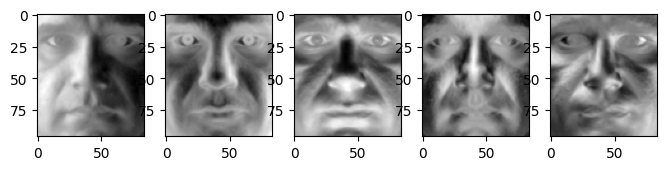

euclidian distance between initial image and reconstructed image
6.8856260204445685e-25


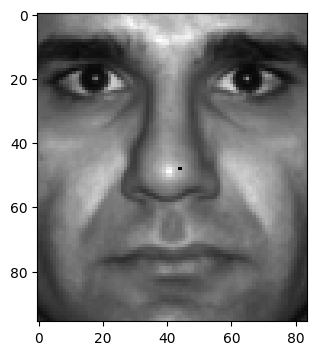

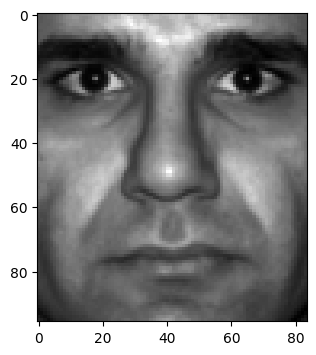

num_of_diffs img space change
1
num_of_diffs pca space change
8064


In [42]:
def e3b():

    M = getFacesMatrix()
    U, meanVec = dualPCA(M)

    for i in range(5):
        plt.subplot(1,5, i+1)
        img = U[:, i].reshape(96, 84)
        # print(img.shape)
        plt.imshow(img, cmap="gray")
    
    plt.show()
    

    # print("U.shape")
    # print(U.shape)


    first_image = UZ_utils.imread_gray(".\\data\\faces\\1\\001.png").reshape(-1, 1)
    pcaSpace_img = U.T @ (first_image - meanVec)
    imgSpace_img = U @ pcaSpace_img + meanVec

    diff = np.sum((first_image - imgSpace_img)**2)
    print("euclidian distance between initial image and reconstructed image")
    print(diff)

    # plt.imshow(first_image.reshape(96, 84), cmap="gray")
    # plt.show()
    # plt.imshow(imgSpace_img.reshape(96, 84), cmap="gray")
    # plt.show()

    img_space_change = first_image.copy()
    img_space_change[4076] = 0

    pcaSpace_img[0] = 0
    imgSpace_img = U @ pcaSpace_img + meanVec

    plt.imshow(img_space_change.reshape(96, 84), cmap="gray")
    plt.show()
    plt.imshow(imgSpace_img.reshape(96, 84), cmap="gray")
    plt.show()

    diff_vec = np.abs(first_image - img_space_change)
    num_of_diffs = np.sum(diff_vec > 1e-15)
    print("num_of_diffs img space change")
    print(num_of_diffs)


    diff_vec = np.abs(first_image - imgSpace_img)
    num_of_diffs = np.sum(diff_vec > 10e-15)
    print("num_of_diffs pca space change")
    print(num_of_diffs)






e3b()

What is the difference?
How many pixels are changed by the first operation and how many by the second?

All of the pixels are changed in the second change (the pca space change).

[[0.24050245]
 [0.23964461]
 [0.24215686]
 ...
 [0.18057598]
 [0.18823529]
 [0.19221814]]


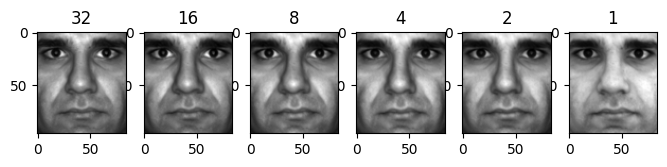

In [32]:
def e3c():

    M = getFacesMatrix()
    U, meanVec = dualPCA(M)


    first_image = UZ_utils.imread_gray(".\\data\\faces\\1\\001.png").reshape(-1, 1)
    pcaSpace_img = U.T @ (first_image - meanVec)

    for i in range(6):
        reduct_num = (2**i)

        pcaSpace_img_reduced = pcaSpace_img.copy()
        pcaSpace_img_reduced[reduct_num:] = 0

        imgSpace_img = U @ pcaSpace_img_reduced + meanVec



        plt.subplot(1,6,6-i)
        plt.title(reduct_num)
        plt.imshow(imgSpace_img.reshape(96, 84), cmap="gray")

    plt.show()



e3c()

